In [7]:

# import the load_boston() function from sklearn.datasets
from sklearn.datasets import load_boston

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
#instantiate load_boston function
boston = load_boston()

# print(boston.data)
# print(boston.data.shape)

bos = pd.DataFrame(boston.data)
bos.columns = boston.feature_names
bos['PRICE'] = boston.target

In [9]:
# from Eric Botcher; description of Boston data
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [10]:
# boston dataframe
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [11]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Attributes
#### - CRIM  per capita crime rate by town
#### - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
#### - INDUS    proportion of non-retail business acres per town
#### - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#### - NOX      nitric oxides concentration (parts per 10 million)
#### - RM       average number of rooms per dwelling
#### - AGE      proportion of owner-occupied units built prior to 1940
#### - DIS      weighted distances to five Boston employment centres
#### - RAD      index of accessibility to radial highways
#### - TAX      full-value property-tax rate per 10,000 dollars
#### - PTRATIO  pupil-teacher ratio by town
#### - B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#### - LSTAT    % lower status of the population
#### - PRICE     Median value of owner-occupied homes in 1000's of dollars

# Lets plot some of the features and try to fit them to a curve
## Price, Pupil-Teacher Ratio, Black Population and Crime

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


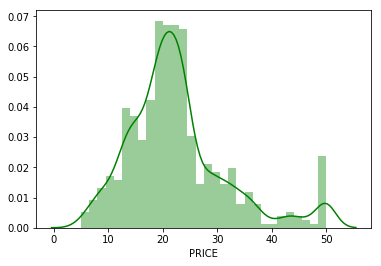

In [12]:
# Here is the general distribution of housing prices 
sns.distplot(bos.PRICE, bins=30, kde=True, color="green")
plt.show()

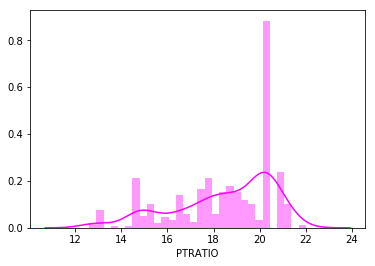

In [13]:
# We can see that in most places the pupil teacher ratio is about 20 to 1
sns.distplot(bos.PTRATIO, bins=30, kde=True, color="magenta")
plt.show()

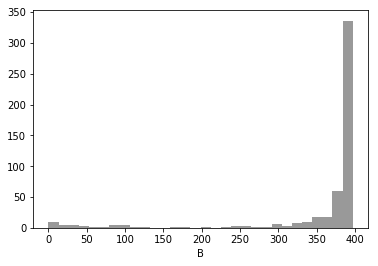

In [14]:
# This likely shows some segregation. 
# Many areas with very low black populations and few areas with very high black populations.
# I turned off KDE here because it distorted the data too much
sns.distplot(bos.B, bins=30, kde=False, color="black")
plt.show()

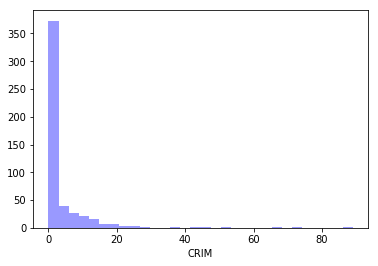

In [15]:
# Again no KDE for this plot
sns.distplot(bos.CRIM, bins=30, kde=False, color="blue")
plt.show()

# Let's look at: 

### 1) Crime rates vs property tax values
### 2) Crime rates vs. median house prices 
### 3) Median house prices vs. number of rooms
### 4) Housing Prices vs. Lower status residents
### 5) Crime per capita vs. Large Houses

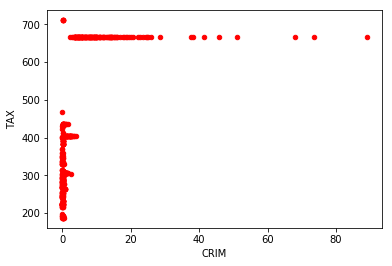

In [16]:
# Crime vs Tax 
bos.plot.scatter(x="CRIM", y="TAX", c="red")


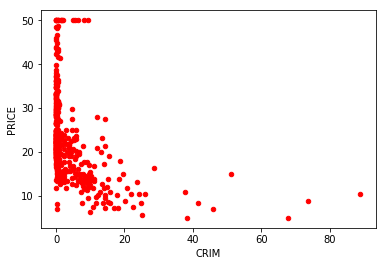

In [17]:
# It looks like lower rates of crime generally happen with lower housing values
bos.plot.scatter(x="CRIM", y="PRICE", c="red")

In [18]:
# rounding number of rooms to nearest int 
plot_bos = bos.round({'RM': 0})

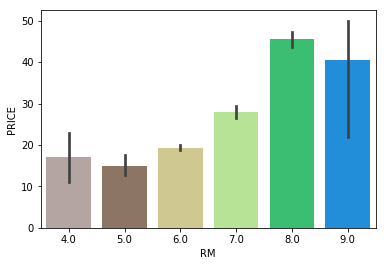

In [19]:
# we can see that generally, more expensive homes have more rooms
sns.barplot(x='RM', y='PRICE', palette='terrain_r', data=plot_bos)

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1672: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '


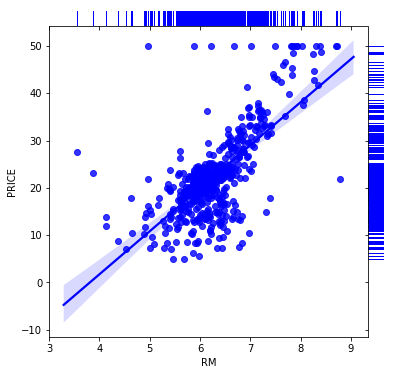

In [20]:
grid = sns.JointGrid(x='RM', y='PRICE', data=bos, space=0, size=6, ratio=20)
grid.plot_joint(sns.regplot, color="b")
grid.plot_marginals(sns.rugplot, color="b", height=2)
plt.show()

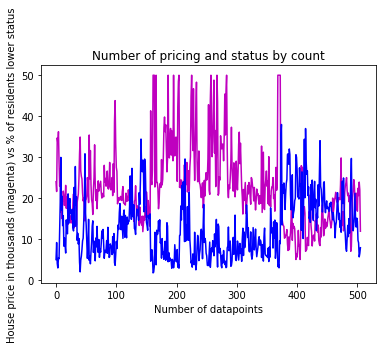

In [21]:
# Plotting all the house prices vs % of residents lower class
plt.plot(bos.index, bos.PRICE, 'm') # range 5-50 mean 22.5 
plt.plot(bos.index, bos.LSTAT, 'b') # range 1.7 to 38 mean 12.7
plt.title('Number of pricing and status by count')
plt.ylabel('House price in thousands (magenta) vs % of residents lower status');
plt.xlabel('Number of datapoints');

# we can see divergence between higher housing prices and % of residents who are lower class

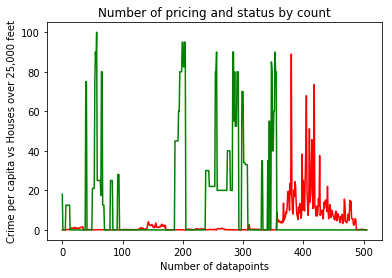

In [22]:
plt.plot(bos.index, bos.CRIM, 'r')
plt.plot(bos.index, bos.ZN, 'g') 
plt.title('Number of pricing and status by count')
plt.ylabel('Crime per capita vs Houses over 25,000 feet');
plt.xlabel('Number of datapoints');

# we can see that all of the elevated crime is in areas where there are very few houses zoned at over 25,000 feet

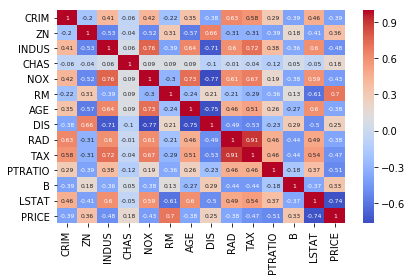

In [23]:
sns.heatmap(data=bos.corr().round(2), cmap='coolwarm', annot=True, annot_kws={"size":6})
plt.tight_layout()
plt.show()

In [24]:
# Bring in Linear Regression tools
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [25]:
# create an array for features
feature_cols = ["RM"]

X = bos[feature_cols]
y = bos.PRICE

X_train, X_test, y_train, y_test = train_test_split(X, y)

# Designate X and y values
# X_train = bos[feature_cols][:380]
# Y_train = bos.PRICE[:380]


In [26]:
lr_reg = LinearRegression() # instantiate LinearRegression class
lr_reg.fit(X_train, y_train) # obtain line of best fit


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [27]:
print(lr_reg.coef_)
print(lr_reg.intercept_)

[8.8243928]
-32.86671351220951


In [28]:
X_test = bos[feature_cols][126:]
y_test = bos.PRICE[126:]

In [29]:
lr_reg.predict(X_test).round(4)

array([16.6646, 17.3706, 23.883 , 16.8764, 24.1212, 22.9564, 23.3623,
       18.5089, 17.9353, 23.0358, 19.5678, 24.0859, 18.8178, 21.4121,
       21.6151, 11.4229, 14.8115, 15.3851, 10.3993, 21.2268, 16.797 ,
       10.6022, 12.8966, 16.5234, 21.1562, 14.8203, 11.3611, 17.5117,
       21.218 , 21.421 , 13.6555, 28.401 , 20.6621, 24.5801, 22.2857,
       33.2192, 35.9812, 41.0376, 18.7913, 20.9709, 37.1019, 18.9942,
       22.8946, 23.627 , 18.9766, 19.0207, 16.3028, 23.7506, 18.8354,
       24.8978, 20.2561, 22.8593, 27.6686, 28.7275, 35.6547, 21.3504,
       30.2718, 25.0478, 16.5852, 21.4298, 36.2371, 26.9803, 24.986 ,
       30.5365, 28.4716, 26.6009, 30.4748, 27.1392, 25.4096, 36.6254,
       31.4366, 29.8482, 31.3219, 28.6834, 30.0953, 21.5092, 34.2869,
       36.4312, 38.0285, 19.1178, 22.9564, 18.1648, 20.6444, 14.2908,
       19.7267, 14.8203, 18.3765, 23.3888, 14.8909, 21.6857, 19.0913,
       25.7449, 19.6472, 23.3711, 28.4716, 21.5268, 27.8363, 25.5331,
       40.0757, 44.1

In [30]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [32]:
# Returns the coefficient of determination R^2 of the prediction.
lr_reg.score(X_test, y_test)

0.4627520181637021

In [34]:
print("R squared result for RM vs PRICE:")
r2_score(y_test, lr_reg.predict(X_test))

R squared result for RM vs PRICE:


0.46275201816370204

In [35]:
print("Mean squared error for RM vs PRICE:")
mean_squared_error(y_test, lr_reg.predict(X_test)) # doesn't seem right

Mean squared error for RM vs PRICE:


55.08237542932401

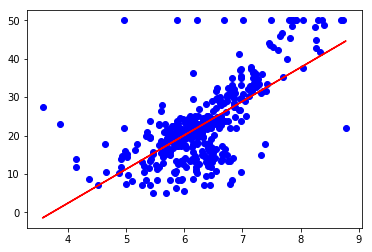

In [36]:
plt.scatter(X_test, y_test,  color='b')
plt.plot(X_test, lr_reg.predict(X_test), color='r')

plt.show()

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:1672: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.7/site-packages/matplotlib/tight_layout.py:199: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  warnings.warn('Tight layout not applied. '
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


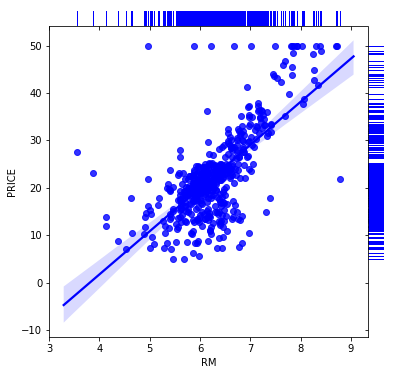

In [37]:
# Another way to plot the same data
grid = sns.JointGrid(x='RM', y='PRICE', data=bos, space=0, size=6, ratio=20)
grid.plot_joint(sns.regplot, color="b")
grid.plot_marginals(sns.rugplot, color="b", height=2)
plt.show()